In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('owid-covid-data-kenya.csv')
print(data)

    iso_code continent location        date  total_cases  new_cases  \
0        KEN    Africa    Kenya  06/03/2020          NaN        NaN   
1        KEN    Africa    Kenya  07/03/2020          NaN        NaN   
2        KEN    Africa    Kenya  08/03/2020          NaN        NaN   
3        KEN    Africa    Kenya  09/03/2020          NaN        NaN   
4        KEN    Africa    Kenya  10/03/2020          NaN        NaN   
..       ...       ...      ...         ...          ...        ...   
494      KEN    Africa    Kenya  13/07/2021     189703.0      761.0   
495      KEN    Africa    Kenya  14/07/2021     190183.0      480.0   
496      KEN    Africa    Kenya  15/07/2021     191020.0      837.0   
497      KEN    Africa    Kenya  16/07/2021     191712.0      692.0   
498      KEN    Africa    Kenya  17/07/2021     192435.0      723.0   

     total_deaths  new_deaths  new_tests  total_tests  positive_rate  \
0             NaN         NaN        NaN         31.0            NaN   
1  

In [55]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'new_tests', 'total_tests',
       'positive_rate', 'people_vaccinated'],
      dtype='object')

In [56]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,people_vaccinated
0,KEN,Africa,Kenya,06/03/2020,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN
1,KEN,Africa,Kenya,07/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KEN,Africa,Kenya,08/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KEN,Africa,Kenya,09/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KEN,Africa,Kenya,10/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
data.isnull().sum()

iso_code               0
continent              0
location               0
date                   0
total_cases            7
new_cases              7
total_deaths          20
new_deaths            20
new_tests            322
total_tests          277
positive_rate        131
people_vaccinated    431
dtype: int64

In [59]:
data.query("location == 'Kenya'")

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,people_vaccinated
0,KEN,Africa,Kenya,06/03/2020,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN
1,KEN,Africa,Kenya,07/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KEN,Africa,Kenya,08/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KEN,Africa,Kenya,09/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KEN,Africa,Kenya,10/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
494,KEN,Africa,Kenya,13/07/2021,189703.0,761.0,3732.0,9.0,NaN,NaN,NaN,1028669.0
495,KEN,Africa,Kenya,14/07/2021,190183.0,480.0,3737.0,5.0,NaN,NaN,NaN,1030853.0
496,KEN,Africa,Kenya,15/07/2021,191020.0,837.0,3746.0,9.0,NaN,NaN,NaN,1035621.0
497,KEN,Africa,Kenya,16/07/2021,191712.0,692.0,3754.0,8.0,NaN,NaN,NaN,NaN


In [60]:
data.dropna(subset=['date'])

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,people_vaccinated
0,KEN,Africa,Kenya,06/03/2020,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN
1,KEN,Africa,Kenya,07/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KEN,Africa,Kenya,08/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KEN,Africa,Kenya,09/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KEN,Africa,Kenya,10/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
494,KEN,Africa,Kenya,13/07/2021,189703.0,761.0,3732.0,9.0,NaN,NaN,NaN,1028669.0
495,KEN,Africa,Kenya,14/07/2021,190183.0,480.0,3737.0,5.0,NaN,NaN,NaN,1030853.0
496,KEN,Africa,Kenya,15/07/2021,191020.0,837.0,3746.0,9.0,NaN,NaN,NaN,1035621.0
497,KEN,Africa,Kenya,16/07/2021,191712.0,692.0,3754.0,8.0,NaN,NaN,NaN,NaN


In [63]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

In [64]:
data.fillna(0)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,people_vaccinated
0,KEN,Africa,Kenya,2020-03-06,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0
1,KEN,Africa,Kenya,2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,KEN,Africa,Kenya,2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,KEN,Africa,Kenya,2020-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,KEN,Africa,Kenya,2020-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
494,KEN,Africa,Kenya,2021-07-13,189703.0,761.0,3732.0,9.0,0.0,0.0,0.0,1028669.0
495,KEN,Africa,Kenya,2021-07-14,190183.0,480.0,3737.0,5.0,0.0,0.0,0.0,1030853.0
496,KEN,Africa,Kenya,2021-07-15,191020.0,837.0,3746.0,9.0,0.0,0.0,0.0,1035621.0
497,KEN,Africa,Kenya,2021-07-16,191712.0,692.0,3754.0,8.0,0.0,0.0,0.0,0.0


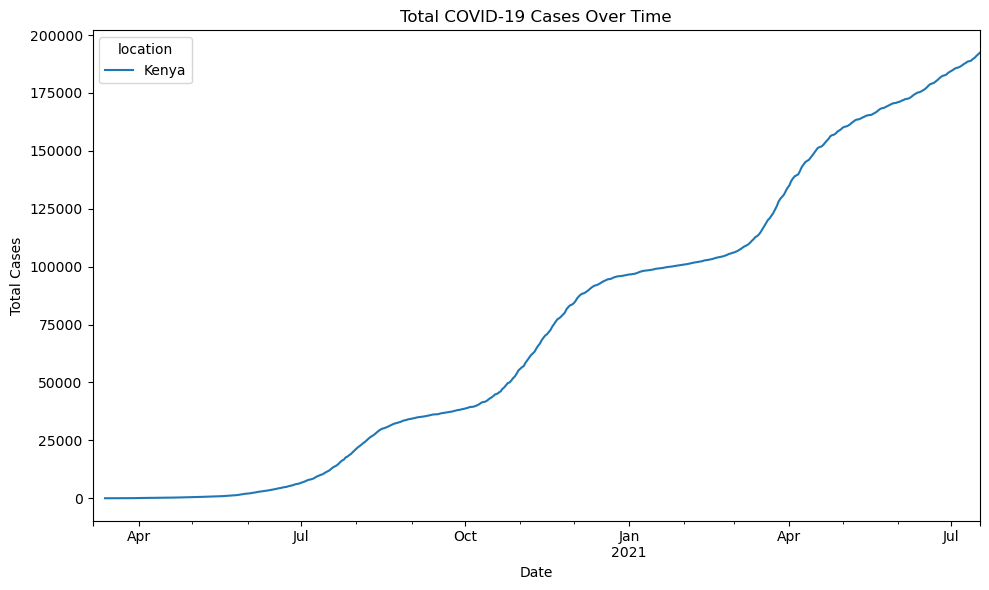

In [65]:
selected_countries = ['United States', 'Kenya', 'Brazil']
data2 = data[data['location'].isin(selected_countries)]

pivot_cases = data2.pivot(index='date', columns='location', values='total_cases')

pivot_cases.plot(figsize=(10,6))
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title='location')
plt.tight_layout()
plt.show()

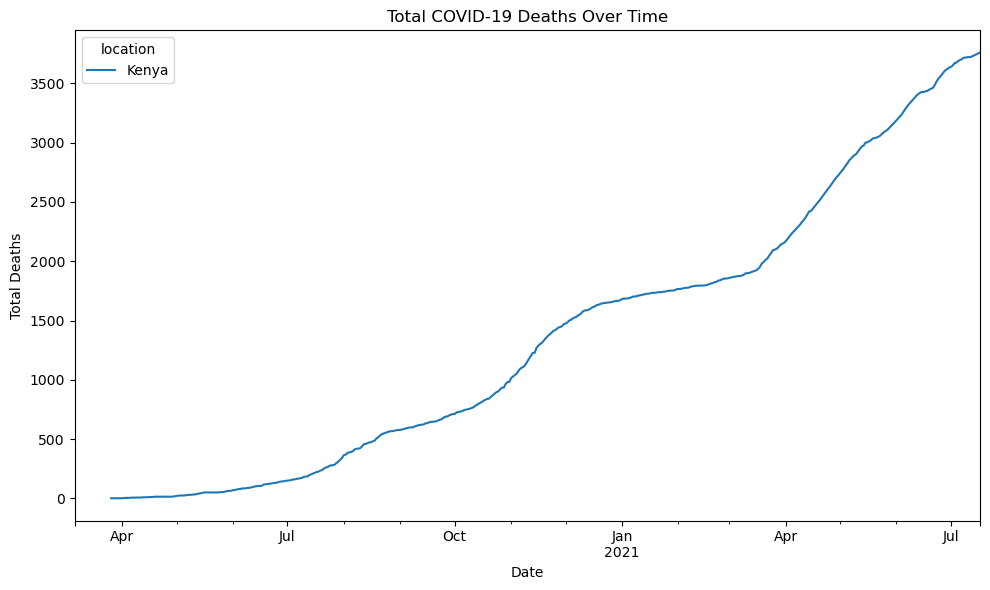

In [66]:
pivot_deaths = data2.pivot(index='date', columns='location', values='total_deaths')

pivot_deaths.plot(figsize=(10,6))
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend(title='location')
plt.tight_layout()
plt.show()


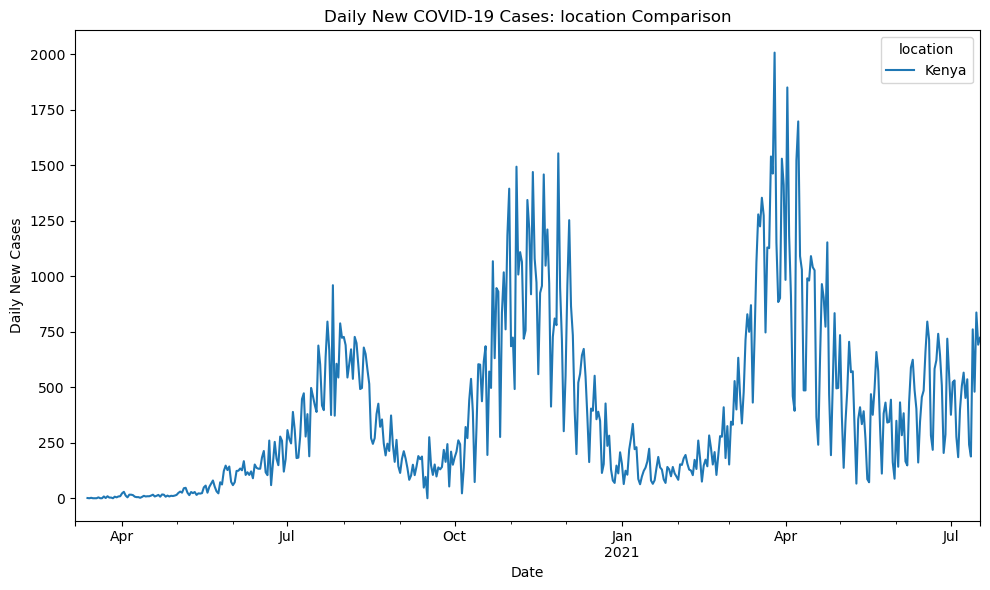

In [67]:
data2 = data2.sort_values(['location', 'date'])
data2['daily_new_cases'] = data2.groupby('location')['total_cases'].diff().fillna(0)

data3 = data2.pivot(index='date', columns='location', values='new_cases')

data3.plot(figsize=(10,6))
plt.title("Daily New COVID-19 Cases: location Comparison")
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.legend(title='location')
plt.tight_layout()
plt.show()

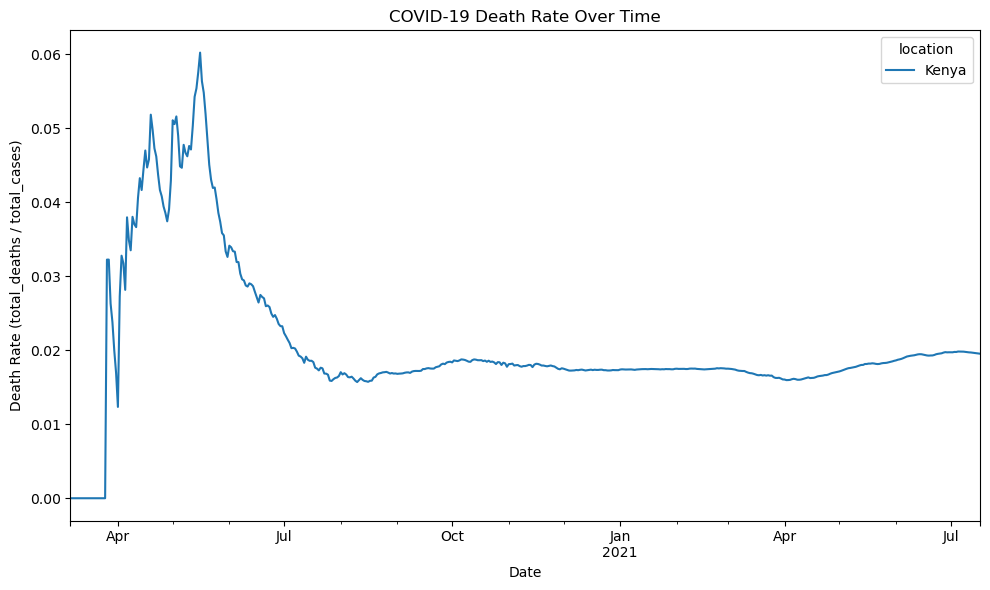

In [68]:
data2['death_rate'] = data2['total_deaths'] / data2['total_cases']
data2['death_rate'] = data2['death_rate'].replace([float('inf'), -float('inf')], pd.NA)
data2['death_rate'] = data2['death_rate'].fillna(0)

data3 = data2.pivot(index='date', columns='location', values='death_rate')

data3.plot(figsize=(10,6))
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (total_deaths / total_cases)")
plt.legend(title='location')
plt.tight_layout()
plt.show()


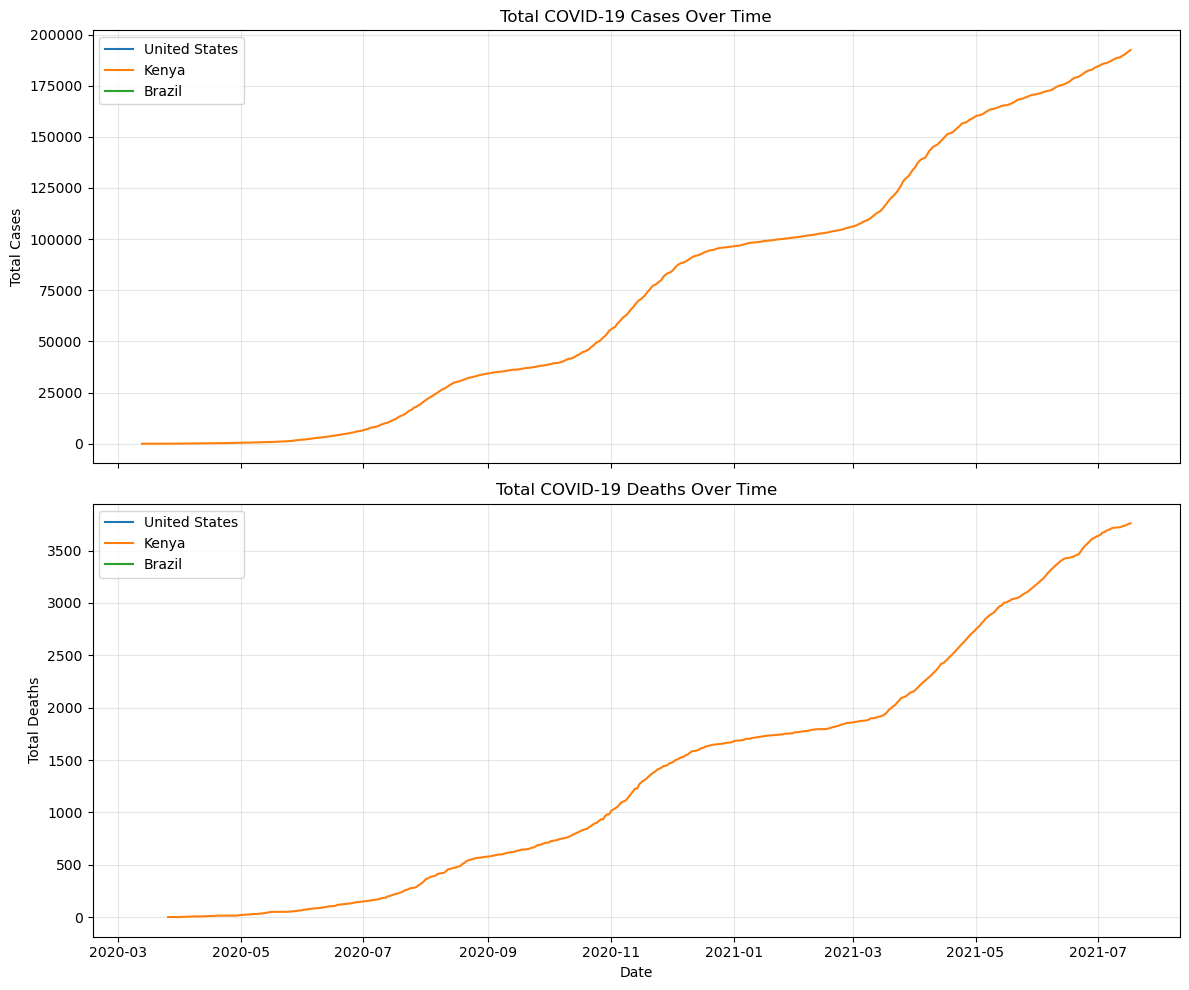

In [69]:
countries = ['United States', 'Kenya', 'Brazil']
data2 = data[data['location'].isin(countries)]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

for location in countries:
    data4 = data2[data2['location'] == location]
    ax1.plot(data4['date'], data4['total_cases'], label=location)

ax1.set_title('Total COVID-19 Cases Over Time')
ax1.set_ylabel('Total Cases')
ax1.legend()
ax1.grid(True, alpha=0.3)

for location in countries:
    data4 = data2[data2['location'] == location]
    ax2.plot(data4['date'], data4['total_deaths'], label=location)

ax2.set_title('Total COVID-19 Deaths Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


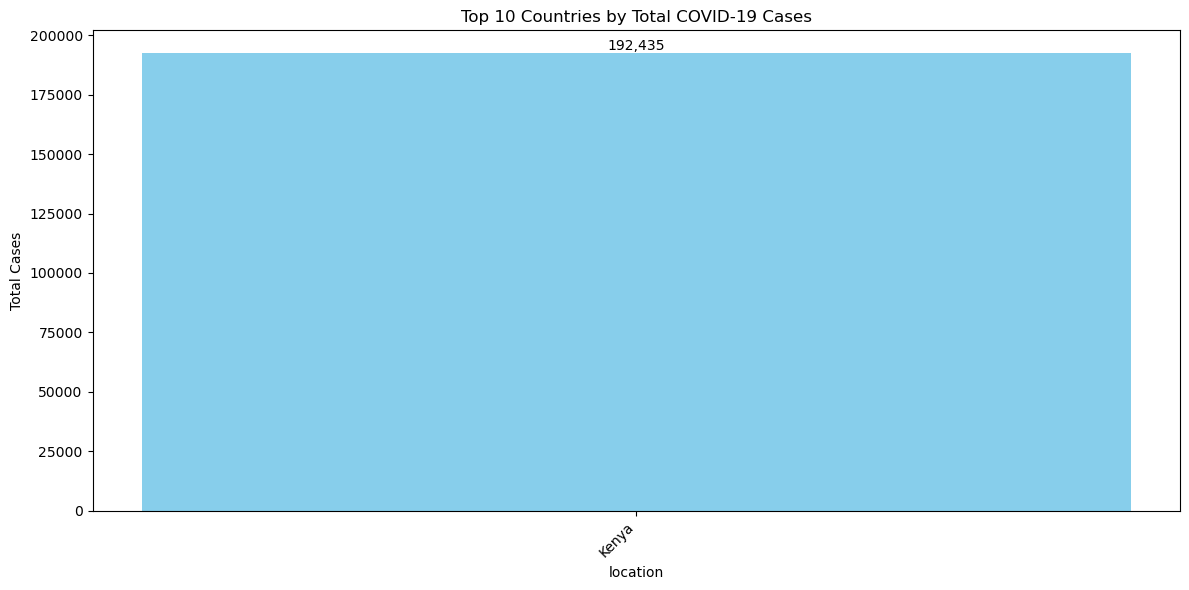

In [70]:
data5 = data.sort_values('date').groupby('location').last().reset_index()

data6 = data5.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(data6['location'], data6['total_cases'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', ha='center', va='bottom', rotation=0)

plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('location')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


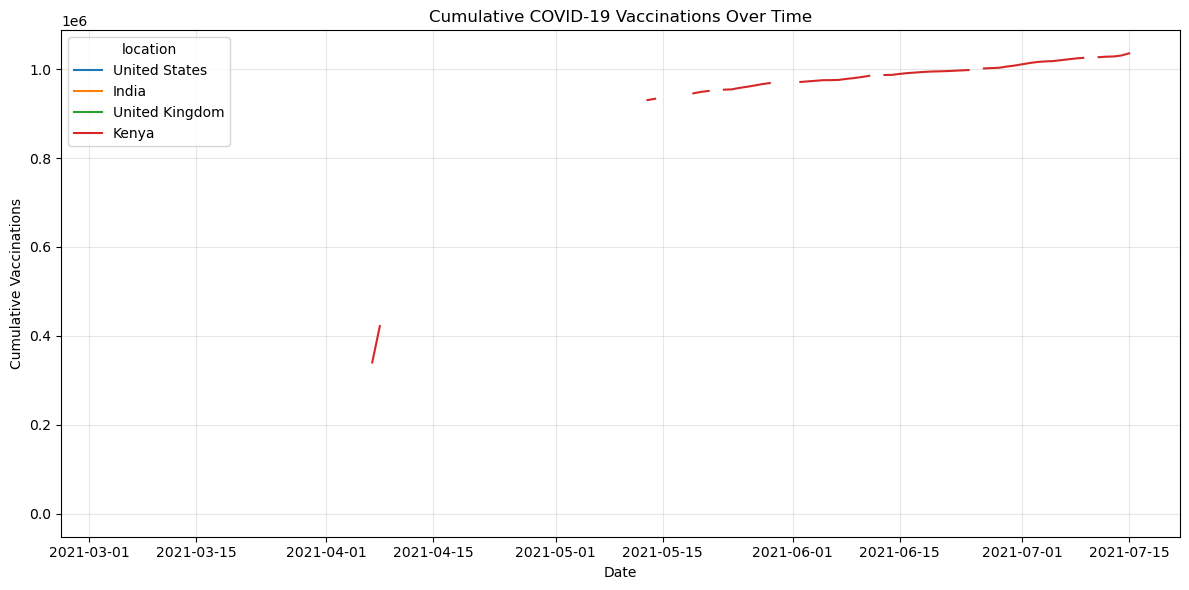

In [71]:
data6 = ['United States', 'India', 'United Kingdom', 'Kenya']

data7 = data[data['location'].isin(data6)]

plt.figure(figsize=(12, 6))

for location in data6:
    data8 = data7[data7['location'] == location]
    plt.plot(data8['date'], data8['people_vaccinated'], label=location)

plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.legend(title='location')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
